# Explore here

In [2]:
# Your code here

## 1) Import required libraries

In [3]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load dataset

In [4]:
airline_data = pd.read_csv('airline_dataset.csv')

## 3) Describe and understand dataset

In [5]:
airline_data.head()
airline_data.info()
airline_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

,Passenger ID,Age
count,98619.000000,98619.000000
mean,55168.689522,45.504021
std,25985.443696,25.929849
min,10000.000000,1.000000
25%,32608.000000,23.000000
50%,55338.000000,46.000000
75%,77695.000000,68.000000
max,99999.000000,90.000000


## 4) Process data

### 4.1) Handle duplicates

In [6]:
if airline_data.drop('Passenger ID', axis=1).duplicated().sum() != 0:
    airline_data = airline_data.drop_duplicates(subset=airline_data.columns.difference(['Passenger ID']))
    airline_data.info()

### 4.3) Remove unnecessary dimensions

In [7]:
airline_data.drop(['Airport Name', 'Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age', 'Nationality', 'Country Name', 'Continents','Pilot Name'], axis=1, inplace=True)
airline_data.head()

,Airport Country Code,Airport Continent,Departure Date,Arrival Airport,Flight Status
0,US,NAM,6/28/2022,CXF,On Time
1,CA,NAM,12/26/2022,YCO,On Time
2,FR,EU,1/18/2022,GNB,On Time
3,CA,NAM,9/16/2022,YND,Delayed
4,US,NAM,2/25/2022,SEE,On Time


## 4.4) Process date column

In [8]:
airline_data['Departure Date'] = pd.to_datetime(airline_data['Departure Date'])
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Airport Country Code  98619 non-null  object        
 1   Airport Continent     98619 non-null  object        
 2   Departure Date        98619 non-null  datetime64[ns]
 3   Arrival Airport       98619 non-null  object        
 4   Flight Status         98619 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.8+ MB


In [9]:
airline_data['Week Day'] = airline_data['Departure Date'].apply(lambda x: x.weekday())
airline_data['Day'] = airline_data['Departure Date'].apply(lambda x: x.day)
airline_data['Month'] = airline_data['Departure Date'].apply(lambda x: x.month)
airline_data['Year'] = airline_data['Departure Date'].apply(lambda x: x.year)
airline_data.drop('Departure Date', axis=1, inplace=True)
airline_data = airline_data.loc[:, ['Airport Country Code', 'Airport Continent', 'Arrival Airport', 'Week Day', 'Day', 'Month', 'Flight Status']]
airline_data.info()
airline_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airport Country Code  98619 non-null  object
 1   Airport Continent     98619 non-null  object
 2   Arrival Airport       98619 non-null  object
 3   Week Day              98619 non-null  int64 
 4   Day                   98619 non-null  int64 
 5   Month                 98619 non-null  int64 
 6   Flight Status         98619 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


,Airport Country Code,Airport Continent,Arrival Airport,Week Day,Day,Month,Flight Status
0,US,NAM,CXF,1,28,6,On Time
1,CA,NAM,YCO,0,26,12,On Time
2,FR,EU,GNB,1,18,1,On Time
3,CA,NAM,YND,4,16,9,Delayed
4,US,NAM,SEE,4,25,2,On Time


### 4.5) Convert categorical to numerical values

In [10]:
# Visualize corresponding values
flight_status_cat = dict(enumerate(airline_data['Flight Status'].astype('category').cat.categories))
country_code_cat = dict(enumerate(airline_data['Airport Country Code'].astype('category').cat.categories))
continent_code_cat = dict(enumerate(airline_data['Airport Continent'].astype('category').cat.categories))
airport_code_cat = dict(enumerate(airline_data['Arrival Airport'].astype('category').cat.categories))

# Apply labelling 
airline_data['Flight Status'] = airline_data['Flight Status'].astype('category').cat.codes
airline_data['Airport Country Code'] = airline_data['Airport Country Code'].astype('category').cat.codes
airline_data['Airport Continent'] = airline_data['Airport Continent'].astype('category').cat.codes
airline_data['Arrival Airport'] = airline_data['Arrival Airport'].astype('category').cat.codes
airline_data.head()

,Airport Country Code,Airport Continent,Arrival Airport,Week Day,Day,Month,Flight Status
0,219,3,1657,1,28,6,2
1,34,3,8499,0,26,12,2
2,70,2,2679,1,18,1,2
3,34,3,8673,4,16,9,1
4,219,3,6724,4,25,2,2


## 5) Data analysis

### 5.1) Univariate data analysis

In [11]:
""""
cols = ['Airport Country Code', 'Airport Continent', 'Week Day', 'Day', 'Month', 'Year', 'Flight Status']

for col in cols:
    plt.figure(figsize=(8,4))
    sns.countplot(airline_data[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()"

"""


'"\ncols = [\'Airport Country Code\', \'Airport Continent\', \'Week Day\', \'Day\', \'Month\', \'Year\', \'Flight Status\']\n\nfor col in cols:\n    plt.figure(figsize=(8,4))\n    sns.countplot(airline_data[col])\n    plt.xlabel(col)\n    plt.ylabel(\'Frequency\')\n    plt.show()"\n\n'

### 5.2) Multivariate data analysis

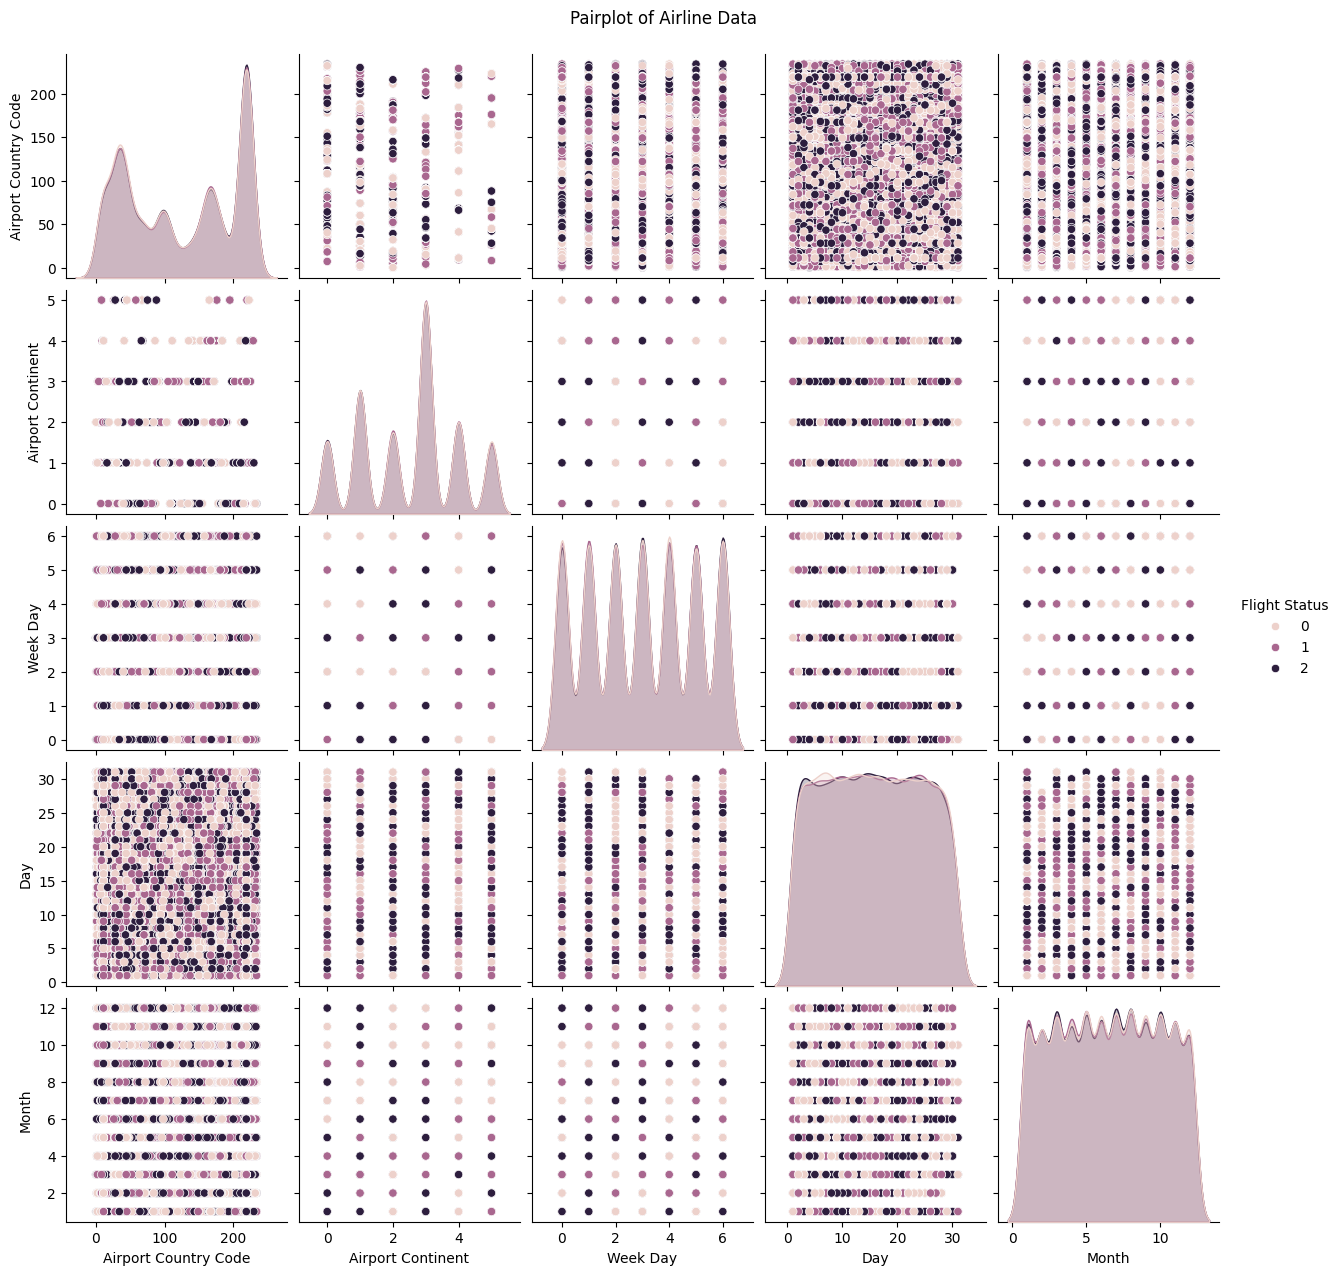

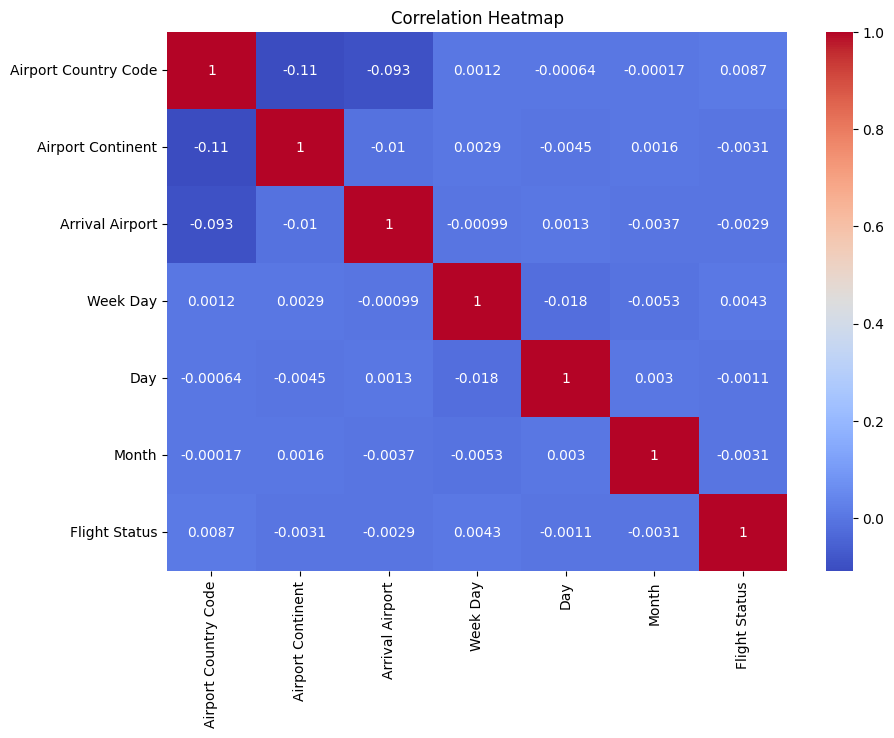

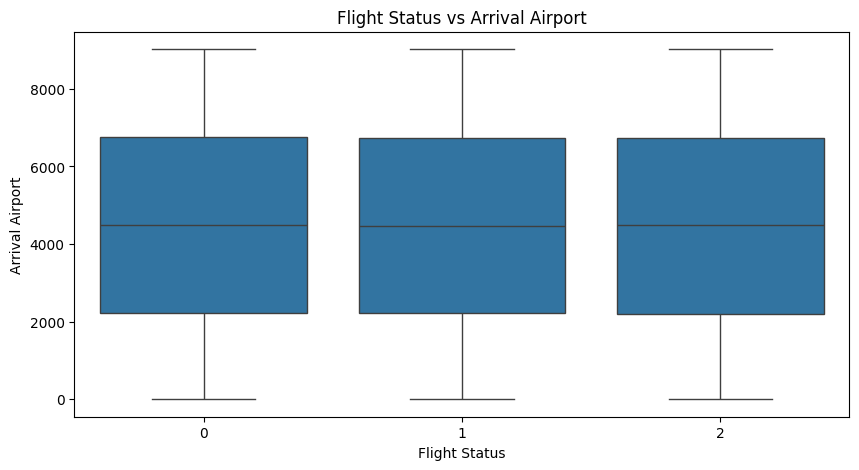

In [12]:
sns.pairplot(airline_data[['Airport Country Code', 'Airport Continent', 
                           'Week Day', 'Day', 'Month', 'Flight Status']], hue='Flight Status')
plt.suptitle('Pairplot of Airline Data', y=1.02)
plt.show()

# Multivariate Analysis: Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(airline_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Multivariate Analysis: Boxplot (Categorical vs Numerical)
plt.figure(figsize=(10,5))
sns.boxplot(x='Flight Status', y='Arrival Airport', data=airline_data)
plt.title('Flight Status vs Arrival Airport')
plt.xlabel('Flight Status')
plt.ylabel('Arrival Airport')
plt.show()

## 6) Train neural network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

# Example features and labels
X = airline_data[['Airport Country Code', 'Airport Continent', 'Arrival Airport', 'Week Day', 'Day', 'Month']]
y = airline_data['Flight Status']  # categorical (0: cancelled, 1: delayed, 2: on-time)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 possible outcomes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy:.2%}")

# Save the trained model
model.save('flight_status_model.h5')

# Save the scaler for later preprocessing
import joblib
joblib.dump(scaler, 'scaler.save')

Epoch 1/20


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-14 19:42:51.654947: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1973/1973 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3274 - loss: 1.1072 - val_accuracy: 0.3321 - val_loss: 1.0988
Epoch 2/20
1973/1973 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3392 - loss: 1.0989 - val_accuracy: 0.3335 - val_loss: 1.0989
Epoch 3/20
1973/1973 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3363 - loss: 1.0988 - val_accuracy: 0.3266 - val_loss: 1.0988
Epoch 4/20
1973/1973 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3327 - loss: 1.0987 - val_accuracy: 0.3254 - val_loss: 1.0991
Epoch 5/20
1973/1973 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3381 - loss: 1.0986 - val_accuracy: 0.3334 - val_loss: 1.0990
Epoch 6/20
1973/1973 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3360 - loss: 1.0987 - val_accuracy: 0.3358 - val_loss: 1.0989
Epoch 7/20
1973/1973 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3361 - loss: 1.0986 - val_accuracy: 0.3398 - val_loss: 1.0985
Epoch 8/20
1973/1973 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3357 - loss: 1.0987 - val_accurac


Test Accuracy: 32.77%


['scaler.save']